#Gas Turbines
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [ ]:
#Gas turbines
import pandas as pd
import numpy as np

In [ ]:
gast = pd.read_csv("/content/gas_turbines.csv")
gast.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

# EDA

In [ ]:
gast.shape

(15039, 11)

In [ ]:
gast.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [ ]:
gast.index

RangeIndex(start=0, stop=15039, step=1)

In [ ]:
gast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
gast.describe().T  # Discripttive statistics  # Here T is for Transformation

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [ ]:
gast.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
gast['TEY'].unique()

array([114.7 , 114.72, 114.71, ..., 123.78, 121.26, 115.52])

In [ ]:
gast['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [ ]:
print("Mean of Turbine Energy Yield is: ", gast['TEY'].mean())
print("Median of Turbine Energy Yield is: ", gast['TEY'].median())

Mean of Turbine Energy Yield is:  134.18846399361658
Median of Turbine Energy Yield is:  133.78


In [ ]:
# Divide/split TEY columns values into two groups using median
tey = []
for i in gast['TEY']:
    if i>=133.78:
        tey.append(1)
    else:
        tey.append(0)
gast['tey'] = tey

In [ ]:
gast.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  tey  
0  3.1547  82.722    0  
1  3.2363  82.776    0  
2  3.2012  82.468    0  
3  3.1923  82.670    0  
4  3.2484  82.311    0

In [ ]:
# Drop column
gast.drop('TEY', axis = 1, inplace = True)
gast.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX',
       'tey'],
      dtype='object')

In [ ]:
# Rename column
gast.rename({'tey': 'TEY'},axis = 1, inplace = True)

In [ ]:
gast.columns  # Check column names

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX',
       'TEY'],
      dtype='object')

In [ ]:
gast['TEY'].value_counts()

1    7658
0    7381
Name: TEY, dtype: int64

In [ ]:
gast[gast.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, CDP, CO, NOX, TEY]
Index: []

In [ ]:
gast.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   
TEY  -0.049689  0.067726 -0.135535  0.490736  0.697080  0.667879 -0.461348   

           CDP        CO       NOX       TEY  
AT   -0.100705 -0.088588 -0.600006 -0.049689  
AP    0.131198  0.041614  0.256744  0.067726  
AH   -0.182010  0.165505  0.143061 -0.135535  
AFDP  0.727152 -0.334207 -0.037299  0.490736  
GTEP  0.993784 -0.508259 -0.208496  0.697080  
TIT   0.887238 -0.688272 -0.231636  0.667879  
TAT  -0.744740  0.063404  0.009888 -0.461348  
CDP   1.000000 -0.520783 -0.169103  0.705370  
CO   -0.520783  1.000000  0.316743 -0.386192  
NOX  -0.169103  0.316743  1.000000 -0.079604  
TEY   0.705370 -0.386192 -0.079604  1.000000

# Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.heatmap(gast.corr(), cmap = "jet", annot = True, linewidth = 1)
plt.show()

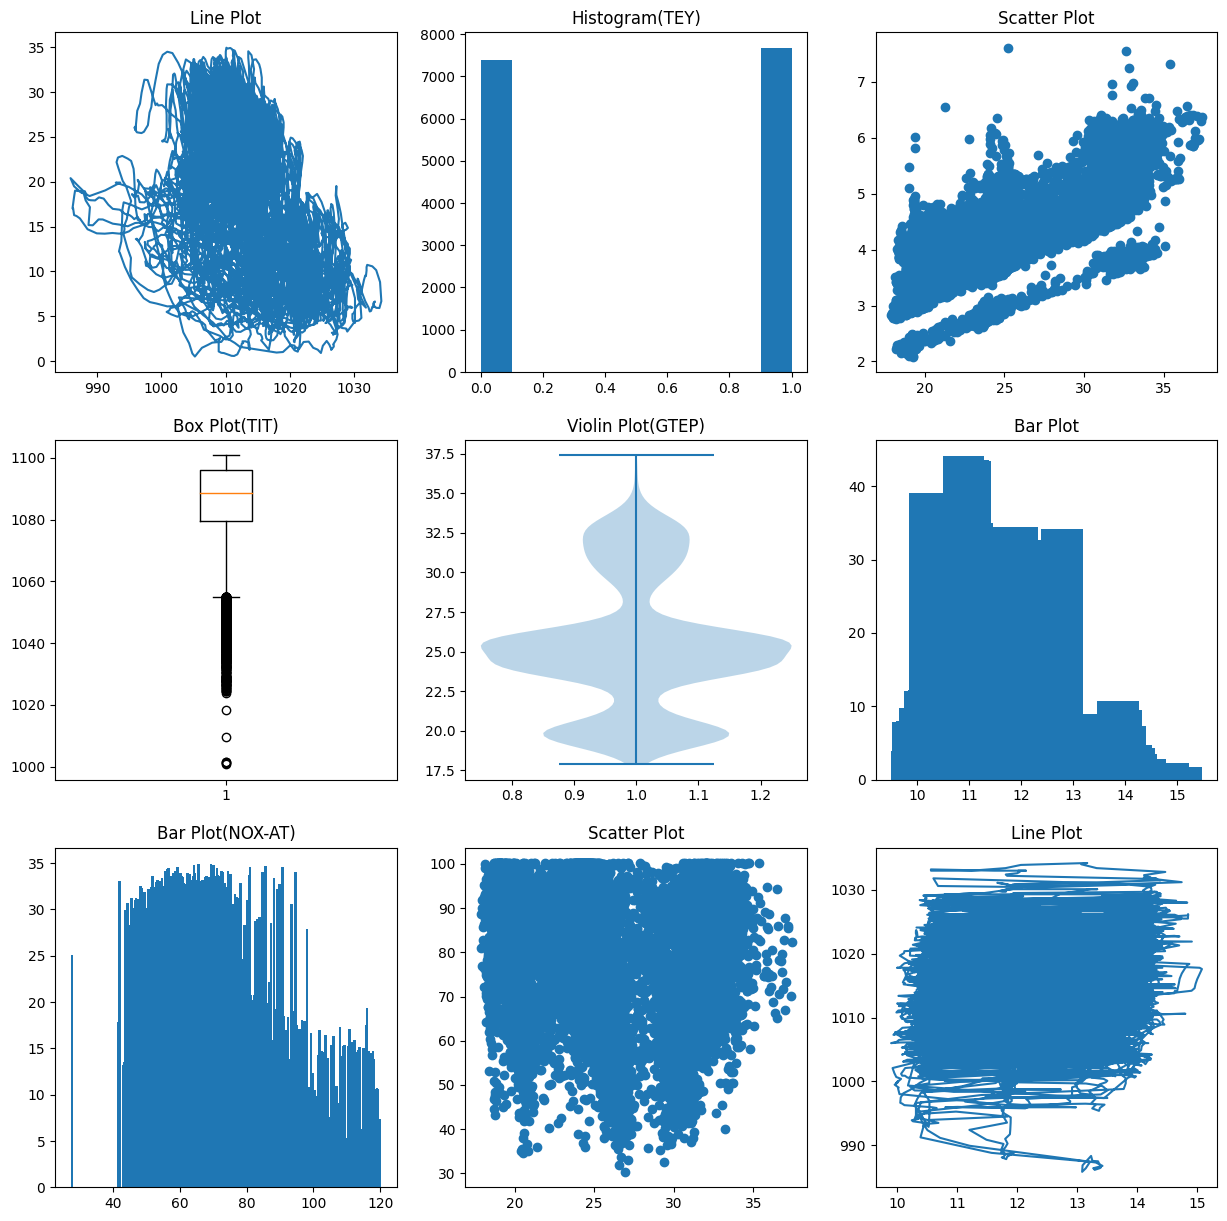

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('AP','AT', data = gast);ax[0,0].set_title("Line Plot")
ax[0,1].hist('TEY', data = gast);ax[0,1].set_title("Histogram(TEY)")
ax[0,2].scatter('GTEP', 'AFDP', data = gast);ax[0,2].set_title("Scatter Plot")
ax[1,0].boxplot('TIT', data = gast);ax[1,0].set_title("Box Plot(TIT)")
ax[1,1].violinplot('GTEP', data = gast);ax[1,1].set_title("Violin Plot(GTEP)")
ax[1,2].bar('CDP','CO', data = gast);ax[1,2].set_title("Bar Plot")
ax[2,0].bar(gast['NOX'], gast["AT"]);ax[2,0].set_title("Bar Plot(NOX-AT)")
ax[2,1].scatter('GTEP','AH', data = gast);ax[2,1].set_title("Scatter Plot")
ax[2,2].plot('CDP','AP', data = gast);ax[2,2].set_title("Line Plot")
plt.show()

<ipython-input-27-54a559a68038>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(3,3,1), sns.boxplot(x=gast["AT"])];


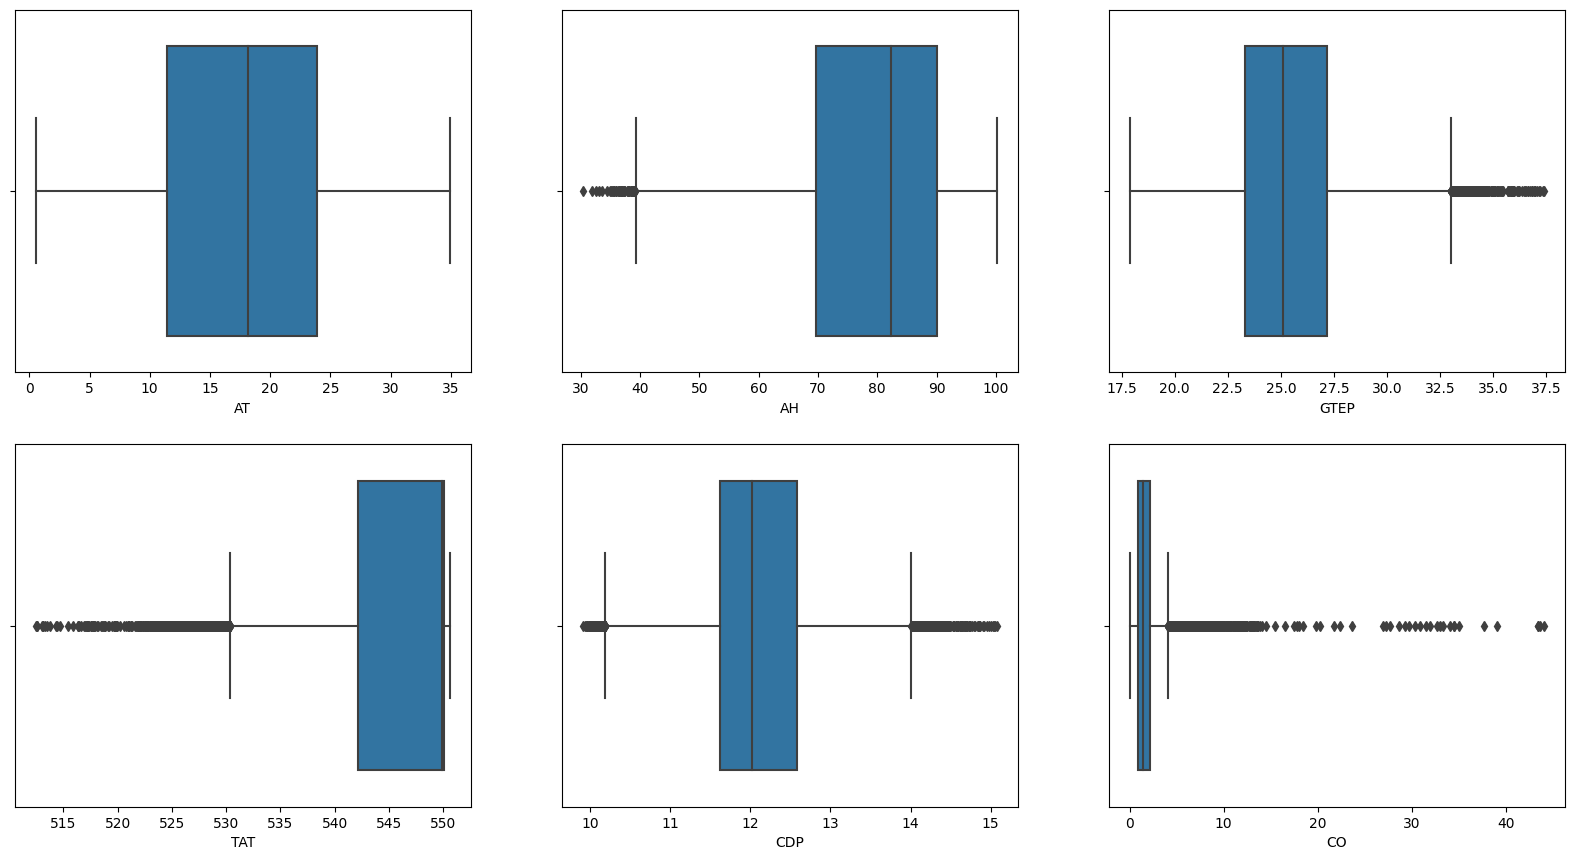

In [ ]:
plt.subplots(figsize=(20,16))
# [plt.subplot(3,3,1), sns.countplot(data=gast, y='CDP')];

# [plt.subplot(3,3,2), sns.countplot(data=gast, y='CO')];

[plt.subplot(3,3,1), sns.boxplot(x=gast["AT"])];

[plt.subplot(3,3,2), sns.boxplot(x=gast["AH"])];

[plt.subplot(3,3,3), sns.boxplot(x=gast["GTEP"])];

[plt.subplot(3,3,4), sns.boxplot(x=gast["TAT"])];

[plt.subplot(3,3,5), sns.boxplot(x=gast["CDP"])];

[plt.subplot(3,3,6), sns.boxplot(x=gast["CO"])];

# [plt.subplot(3,3,9), sns.boxplot(x=gast["NOX"])]

In [ ]:
sns.jointplot(x = 'AT', y='CDP', data = gast, kind= 'kde', shade = True, color = 'purple')  # shade = True: filed with color shape
plt.title("Density Plot", size = 20, y= 1.2)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


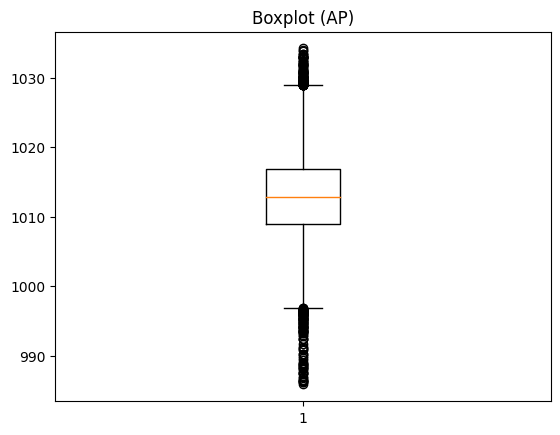

In [ ]:
plt.boxplot(gast['AP']); plt.title("Boxplot (AP)")
plt.show()

In [ ]:
sns.pairplot(gast, hue = 'TEY')
plt.show()

# Neural Network

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM   # we can use LSTM instead  of Dense
from sklearn import preprocessing

In [ ]:
X , Y = gast.iloc[:,:-1], gast['TEY']
print(Y)
X

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY, Length: 15039, dtype: int64


AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [ ]:
# Architecture
model = Sequential()
model.add(Dense(12, input_dim = 10, activation = "relu", name = 'inpurt_layer_Dense'))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
# Compile Model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inpurt_layer_Dense (Dense)  (None, 12)                132       
                                                                 
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fit_model = model.fit(X, Y, validation_split = 0.33, epochs = 250, batch_size = 10)

In [ ]:
fit_model = model.fit(X, Y, validation_split = 0.33, epochs = 250, batch_size = 10)

In [ ]:
# Evaluating the Model
score1 = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], score1[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 0.3037 - accuracy: 0.7955
accuracy: 79.55%


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
# Visualization of Training History
fit_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
fit_model.history['accuracy']

[0.8236403465270996,
 0.8245335221290588,
 0.8328701853752136,
 0.8254267573356628,
 0.8283048868179321,
 0.8235411047935486,
 0.8317784667015076,
 0.8336641788482666,
 0.8318777084350586,
 0.8312822580337524,
 0.8274116516113281,
 0.8336641788482666,
 0.8287018537521362,
 0.827709436416626,
 0.8258237242698669,
 0.8287018537521362,
 0.8230448365211487,
 0.8230448365211487,
 0.8201667070388794,
 0.8331679105758667,
 0.8256252408027649,
 0.8393211364746094,
 0.8306868076324463,
 0.8313814997673035,
 0.8289003372192383,
 0.8245335221290588,
 0.8323739767074585,
 0.8286026120185852,
 0.8246327638626099,
 0.8253275156021118,
 0.8161969184875488,
 0.8235411047935486,
 0.8275108933448792,
 0.8246327638626099,
 0.8227471113204956,
 0.8315799832344055,
 0.8327709436416626,
 0.8289995789527893,
 0.8256252408027649,
 0.8287018537521362,
 0.8325724601745605,
 0.826716959476471,
 0.8310837745666504,
 0.826716959476471,
 0.8325724601745605,
 0.8372370004653931,
 0.8297935724258423,
 0.8332671523094

In [ ]:
fit_model.history['val_accuracy']

[0.8611726760864258,
 0.8619786500930786,
 0.8172476291656494,
 0.8422325253486633,
 0.8160386681556702,
 0.8654040098190308,
 0.8259117603302002,
 0.8363893032073975,
 0.8035462498664856,
 0.8565383553504944,
 0.8255087733268738,
 0.8412250876426697,
 0.8305460214614868,
 0.860971212387085,
 0.8478742837905884,
 0.8645980358123779,
 0.8650010228157043,
 0.8553294539451599,
 0.8599637150764465,
 0.8641950488090515,
 0.844650387763977,
 0.861777126789093,
 0.8666129112243652,
 0.8285311460494995,
 0.8422325253486633,
 0.852508544921875,
 0.8293371200561523,
 0.8553294539451599,
 0.8645980358123779,
 0.8629860877990723,
 0.8633890748023987,
 0.8585532903671265,
 0.8208744525909424,
 0.8557324409484863,
 0.847471296787262,
 0.8458593487739563,
 0.8337699174880981,
 0.8625831007957458,
 0.8240983486175537,
 0.8633890748023987,
 0.8583518266677856,
 0.8627846240997314,
 0.8668144345283508,
 0.8650010228157043,
 0.8579488396644592,
 0.8329639434814453,
 0.8664114475250244,
 0.863590598106384

In [ ]:
fit_model.history['loss']

[0.31402578949928284,
 0.3115026354789734,
 0.30738845467567444,
 0.3147970139980316,
 0.3101571798324585,
 0.31857815384864807,
 0.3062079846858978,
 0.3091021776199341,
 0.3154081404209137,
 0.31153634190559387,
 0.31330519914627075,
 0.31042182445526123,
 0.31795355677604675,
 0.31049904227256775,
 0.3211088180541992,
 0.31148746609687805,
 0.3153659403324127,
 0.31567680835723877,
 0.3160601258277893,
 0.30638357996940613,
 0.31589341163635254,
 0.3103276193141937,
 0.3111395835876465,
 0.310444176197052,
 0.311322420835495,
 0.31529369950294495,
 0.30860456824302673,
 0.31577345728874207,
 0.3209860920906067,
 0.31328481435775757,
 0.3202810287475586,
 0.31882742047309875,
 0.31417006254196167,
 0.3181842565536499,
 0.3246597647666931,
 0.3134433627128601,
 0.3105204701423645,
 0.3110790550708771,
 0.3136098384857178,
 0.31127581000328064,
 0.31426408886909485,
 0.3201286494731903,
 0.31041625142097473,
 0.3130077123641968,
 0.3131812512874603,
 0.3067067861557007,
 0.310919433832

In [ ]:
fit_model.history['val_loss']

[0.2499002069234848,
 0.2501215636730194,
 0.3086548149585724,
 0.26580938696861267,
 0.3390018045902252,
 0.24863775074481964,
 0.28724971413612366,
 0.2701534330844879,
 0.32370099425315857,
 0.25431472063064575,
 0.2892094552516937,
 0.2673478424549103,
 0.27506858110427856,
 0.24945379793643951,
 0.2643989622592926,
 0.2486034631729126,
 0.24700717628002167,
 0.25402265787124634,
 0.25279712677001953,
 0.2446775883436203,
 0.2620615065097809,
 0.25032293796539307,
 0.24521641433238983,
 0.2907875180244446,
 0.2629668414592743,
 0.2583400011062622,
 0.2910304367542267,
 0.25769734382629395,
 0.2511877119541168,
 0.2513175308704376,
 0.24998271465301514,
 0.25676700472831726,
 0.30298808217048645,
 0.2600319981575012,
 0.2669416069984436,
 0.2621125876903534,
 0.27458420395851135,
 0.24845851957798004,
 0.28175845742225647,
 0.24913352727890015,
 0.2527952790260315,
 0.2514464855194092,
 0.24493296444416046,
 0.245743528008461,
 0.2502560317516327,
 0.2723316550254822,
 0.24355848133

In [ ]:
# summarization of history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

In [ ]:
# Summarization of history for 'loss'
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title("Loss in Model")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [ ]:
predictions = model.predict(X)

470/470 [==============================] - 1s 1ms/step


#  Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [ ]:
# fix random seed for reproducability
seed2 = 9
np.random.seed(seed2)

In [ ]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential()     # 0 level
model2.add(Dense(14, input_dim = 10, activation = 'linear'))   #1st layer
model2.add(Dense(9, activation = 'linear'))    #2nd layer
model2.add(Dense(1, activation = 'sigmoid'))   #3rd layer or o/p layer

In [ ]:
# Compile model
# Changing optimizer older = ada, new = adadelta

model2.compile(loss = 'binary_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])

In [ ]:
# Fit the model
# Change epochs from 250, 200
fit_model2 = model2.fit(X, Y, validation_split = 0.33, epochs = 300, batch_size = 15)

Epoch 1/300
672/672 [==============================] - 2s 3ms/step - loss: 5.8949 - accuracy: 0.6516 - val_loss: 0.8297 - val_accuracy: 0.6780
Epoch 2/300
672/672 [==============================] - 2s 3ms/step - loss: 0.8295 - accuracy: 0.6885 - val_loss: 0.5914 - val_accuracy: 0.7804
Epoch 3/300
672/672 [==============================] - 2s 3ms/step - loss: 0.7579 - accuracy: 0.7048 - val_loss: 0.5438 - val_accuracy: 0.7858
Epoch 4/300
672/672 [==============================] - 1s 2ms/step - loss: 0.7037 - accuracy: 0.7205 - val_loss: 0.5172 - val_accuracy: 0.7900
Epoch 5/300
672/672 [==============================] - 2s 2ms/step - loss: 0.6670 - accuracy: 0.7331 - val_loss: 0.4885 - val_accuracy: 0.7880
Epoch 6/300
672/672 [==============================] - 2s 2ms/step - loss: 0.6435 - accuracy: 0.7387 - val_loss: 0.4702 - val_accuracy: 0.7919
Epoch 7/300
672/672 [==============================] - 2s 3ms/step - loss: 0.6241 - accuracy: 0.7390 - val_loss: 0.4689 - val_accuracy: 0.7880

In [ ]:
# Evaluating the Model
score2 = model2.evaluate(X, Y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 0.3180 - accuracy: 0.8283
accuracy: 82.83%


In [ ]:
# Visualization of Training History, metric name and score

model2.metrics_names, score2, fit_model2.history.keys()

(['loss', 'accuracy'],
 [0.31795385479927063, 0.8283130526542664],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [ ]:
fit_model2.history['accuracy']

[0.6516475081443787,
 0.6884676218032837,
 0.7048431634902954,
 0.72052401304245,
 0.7331282496452332,
 0.7386859655380249,
 0.7389837503433228,
 0.7442437410354614,
 0.7460301518440247,
 0.7505954504013062,
 0.7539698481559753,
 0.7562524676322937,
 0.7565501928329468,
 0.7622072100639343,
 0.7630012035369873,
 0.7633981704711914,
 0.7637951374053955,
 0.7648868560791016,
 0.7665740251541138,
 0.7667725086212158,
 0.7704446315765381,
 0.7662762999534607,
 0.7720325589179993,
 0.7715363502502441,
 0.7723302841186523,
 0.768161952495575,
 0.7731242775917053,
 0.7732235193252563,
 0.7750099301338196,
 0.7756053805351257,
 0.7732235193252563,
 0.7747122049331665,
 0.7755061388015747,
 0.7736204862594604,
 0.7757046222686768,
 0.7788805365562439,
 0.7753076553344727,
 0.778285026550293,
 0.7819571495056152,
 0.7807661890983582,
 0.7796744704246521,
 0.779079020023346,
 0.7838428020477295,
 0.7800714373588562,
 0.7838428020477295,
 0.7851330041885376,
 0.7841405272483826,
 0.787514865398407

In [ ]:
fit_model2.history['val_accuracy']

[0.6780173182487488,
 0.7803747653961182,
 0.7858150601387024,
 0.7900463342666626,
 0.7880314588546753,
 0.7918597459793091,
 0.7880314588546753,
 0.7924642562866211,
 0.7870239615440369,
 0.7975015044212341,
 0.7880314588546753,
 0.8009268641471863,
 0.7999194264411926,
 0.8079790472984314,
 0.8043522238731384,
 0.7964940667152405,
 0.8063670992851257,
 0.8103969097137451,
 0.8067700862884521,
 0.8116058707237244,
 0.8071730732917786,
 0.8124118447303772,
 0.8083820343017578,
 0.8013298511505127,
 0.8011283278465271,
 0.8138222694396973,
 0.8057626485824585,
 0.8130162954330444,
 0.8160386681556702,
 0.811202883720398,
 0.8226878643035889,
 0.8136208057403564,
 0.8148297667503357,
 0.8152326941490173,
 0.8144267797470093,
 0.8152326941490173,
 0.8234938383102417,
 0.8228893876075745,
 0.807576060295105,
 0.822486400604248,
 0.8245013356208801,
 0.8190610408782959,
 0.8218819499015808,
 0.8170461654663086,
 0.8245013356208801,
 0.816844642162323,
 0.8257102370262146,
 0.81684464216232

In [ ]:
fit_model2.history['loss']

[5.8948798179626465,
 0.8294746279716492,
 0.7578602433204651,
 0.7037347555160522,
 0.6670317649841309,
 0.6434711217880249,
 0.6240997910499573,
 0.6011916399002075,
 0.589838445186615,
 0.5802559852600098,
 0.5670979022979736,
 0.5560755729675293,
 0.5505643486976624,
 0.5414959788322449,
 0.5326027274131775,
 0.5274436473846436,
 0.5199440717697144,
 0.5156995058059692,
 0.5101927518844604,
 0.5050129890441895,
 0.5023788809776306,
 0.49686551094055176,
 0.4911152720451355,
 0.49045926332473755,
 0.4867115914821625,
 0.48268598318099976,
 0.47875821590423584,
 0.47650760412216187,
 0.4734534025192261,
 0.46933627128601074,
 0.46709534525871277,
 0.4648248851299286,
 0.4628676176071167,
 0.45975807309150696,
 0.4585554003715515,
 0.4556509256362915,
 0.4531437158584595,
 0.4509328305721283,
 0.4499061107635498,
 0.44799456000328064,
 0.44537636637687683,
 0.44449275732040405,
 0.442938894033432,
 0.44126376509666443,
 0.440233439207077,
 0.4369836151599884,
 0.43672963976860046,
 0.

In [ ]:
fit_model2.history['val_loss']

[0.8297220468521118,
 0.5914256572723389,
 0.5438454747200012,
 0.5171817541122437,
 0.48851630091667175,
 0.4702245891094208,
 0.4689308702945709,
 0.4545280635356903,
 0.46489423513412476,
 0.42835620045661926,
 0.4499395191669464,
 0.4105939269065857,
 0.40670499205589294,
 0.3969777822494507,
 0.4524182677268982,
 0.4103609025478363,
 0.38079705834388733,
 0.3804638981819153,
 0.38140496611595154,
 0.380492627620697,
 0.3759845495223999,
 0.3637833893299103,
 0.37227940559387207,
 0.3857326805591583,
 0.38846179842948914,
 0.3528517186641693,
 0.36991646885871887,
 0.3518716096878052,
 0.3466390371322632,
 0.3563438951969147,
 0.34570378065109253,
 0.35050997138023376,
 0.34355491399765015,
 0.34206557273864746,
 0.344647079706192,
 0.34223467111587524,
 0.3356378972530365,
 0.34128764271736145,
 0.3583352565765381,
 0.33132272958755493,
 0.3306525647640228,
 0.3530532717704773,
 0.327682763338089,
 0.3304807245731354,
 0.33944693207740784,
 0.3307807445526123,
 0.3290093243122101,

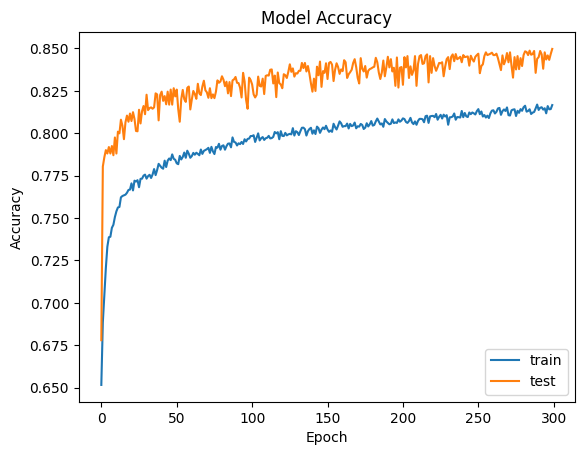

In [ ]:
plt.plot(fit_model2.history['accuracy'])
plt.plot(fit_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

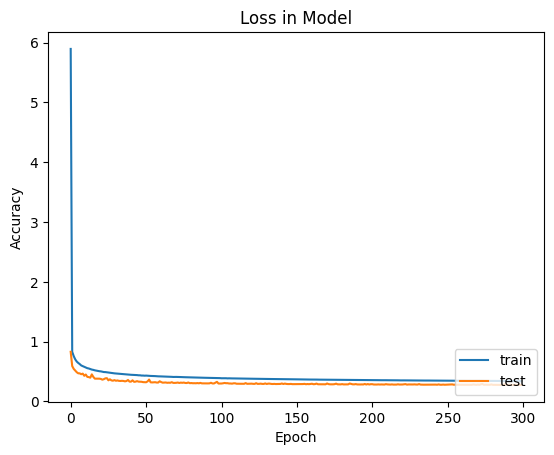

In [ ]:
# Summarization of history for loss
plt.plot(fit_model2.history['loss'])
plt.plot(fit_model2.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

#  Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [ ]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [ ]:
  # creating model with ["sigmoid" and "logistic"]
model3 = Sequential()   # 0 level
model3.add(Dense(14, input_dim = 10 , activation = 'relu'))  # FIRST LAYER
model3.add(Dense(9, activation = 'sigmoid'))  #2nd layer
model3.add(Dense(1, activation = 'tanh'))   #3rd layer or op layer

In [ ]:
# Fit the model
# Change epochs
model3.compile(loss = 'binary_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])

In [ ]:
# Fit the model
# Change epochs
fit_model3 = model3.fit(X, Y, validation_split = 0.33, epochs = 300, batch_size = 15)

Epoch 1/300
672/672 [==============================] - 2s 3ms/step - loss: 8.0585 - accuracy: 0.4776 - val_loss: 7.4405 - val_accuracy: 0.5176
Epoch 2/300
672/672 [==============================] - 2s 3ms/step - loss: 8.0585 - accuracy: 0.4776 - val_loss: 7.4405 - val_accuracy: 0.5176
Epoch 3/300
672/672 [==============================] - 2s 3ms/step - loss: 8.0585 - accuracy: 0.4776 - val_loss: 7.4405 - val_accuracy: 0.5176
Epoch 4/300
672/672 [==============================] - 2s 3ms/step - loss: 8.0585 - accuracy: 0.4776 - val_loss: 7.4405 - val_accuracy: 0.5176
Epoch 5/300
672/672 [==============================] - 2s 3ms/step - loss: 8.0585 - accuracy: 0.4776 - val_loss: 7.4405 - val_accuracy: 0.5176
Epoch 6/300
672/672 [==============================] - 2s 2ms/step - loss: 8.0585 - accuracy: 0.4776 - val_loss: 7.4405 - val_accuracy: 0.5176
Epoch 7/300
672/672 [==============================] - 2s 3ms/step - loss: 8.0585 - accuracy: 0.4776 - val_loss: 7.4405 - val_accuracy: 0.5176

In [ ]:
# Evaluating the Model
score3 = model3.evaluate(X, Y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 7.8545 - accuracy: 0.4908
accuracy: 49.08%


In [ ]:
# Visualization of Training History, metrics name and score
model3.metrics_names, score3, fit_model3.history.keys()

(['loss', 'accuracy'],
 [7.854532718658447, 0.49079060554504395],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

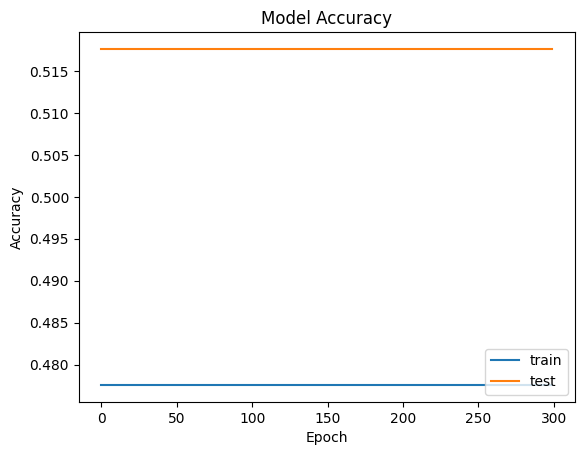

In [ ]:
# Summarization of history for accuracy
plt.plot(fit_model3.history['accuracy'])
plt.plot(fit_model3.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

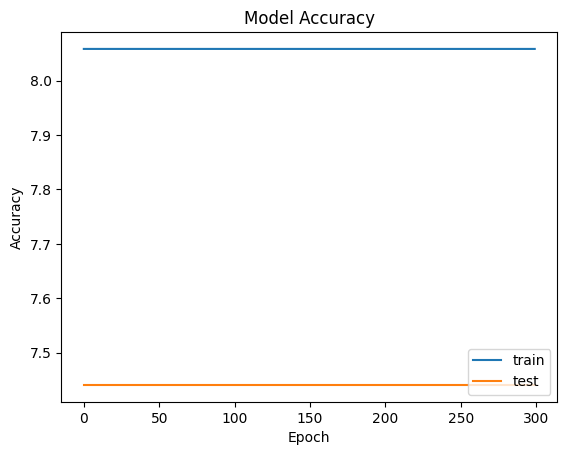

In [ ]:
# Summarization of history for loss
plt.plot(fit_model3.history['loss'])
plt.plot(fit_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

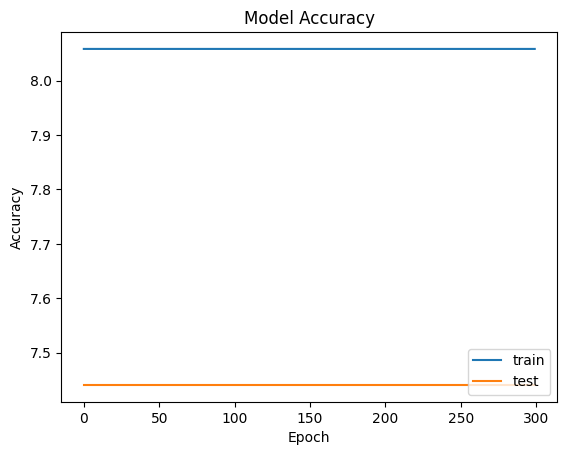

In [ ]:
# Summarizaion of history for loss
plt.plot(fit_model3.history['loss'])
plt.plot(fit_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Decision Tree


In [ ]:
gast['TEY'].unique()

array([0, 1])

In [ ]:
x = gast.drop('TEY', axis = 1)
y = gast['TEY']
print(y)
x

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY, Length: 15039, dtype: int64


AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [ ]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

# Building Decision Tree Classifier Using Entropy Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

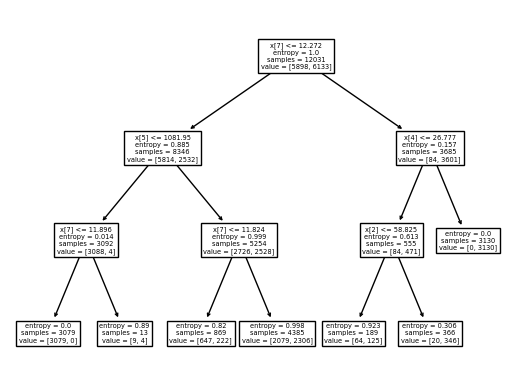

In [ ]:
#Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [ ]:
y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [ ]:
gast.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX',
       'TEY'],
      dtype='object')

In [ ]:
gast['TEY'].value_counts()

1    7658
0    7381
Name: TEY, dtype: int64

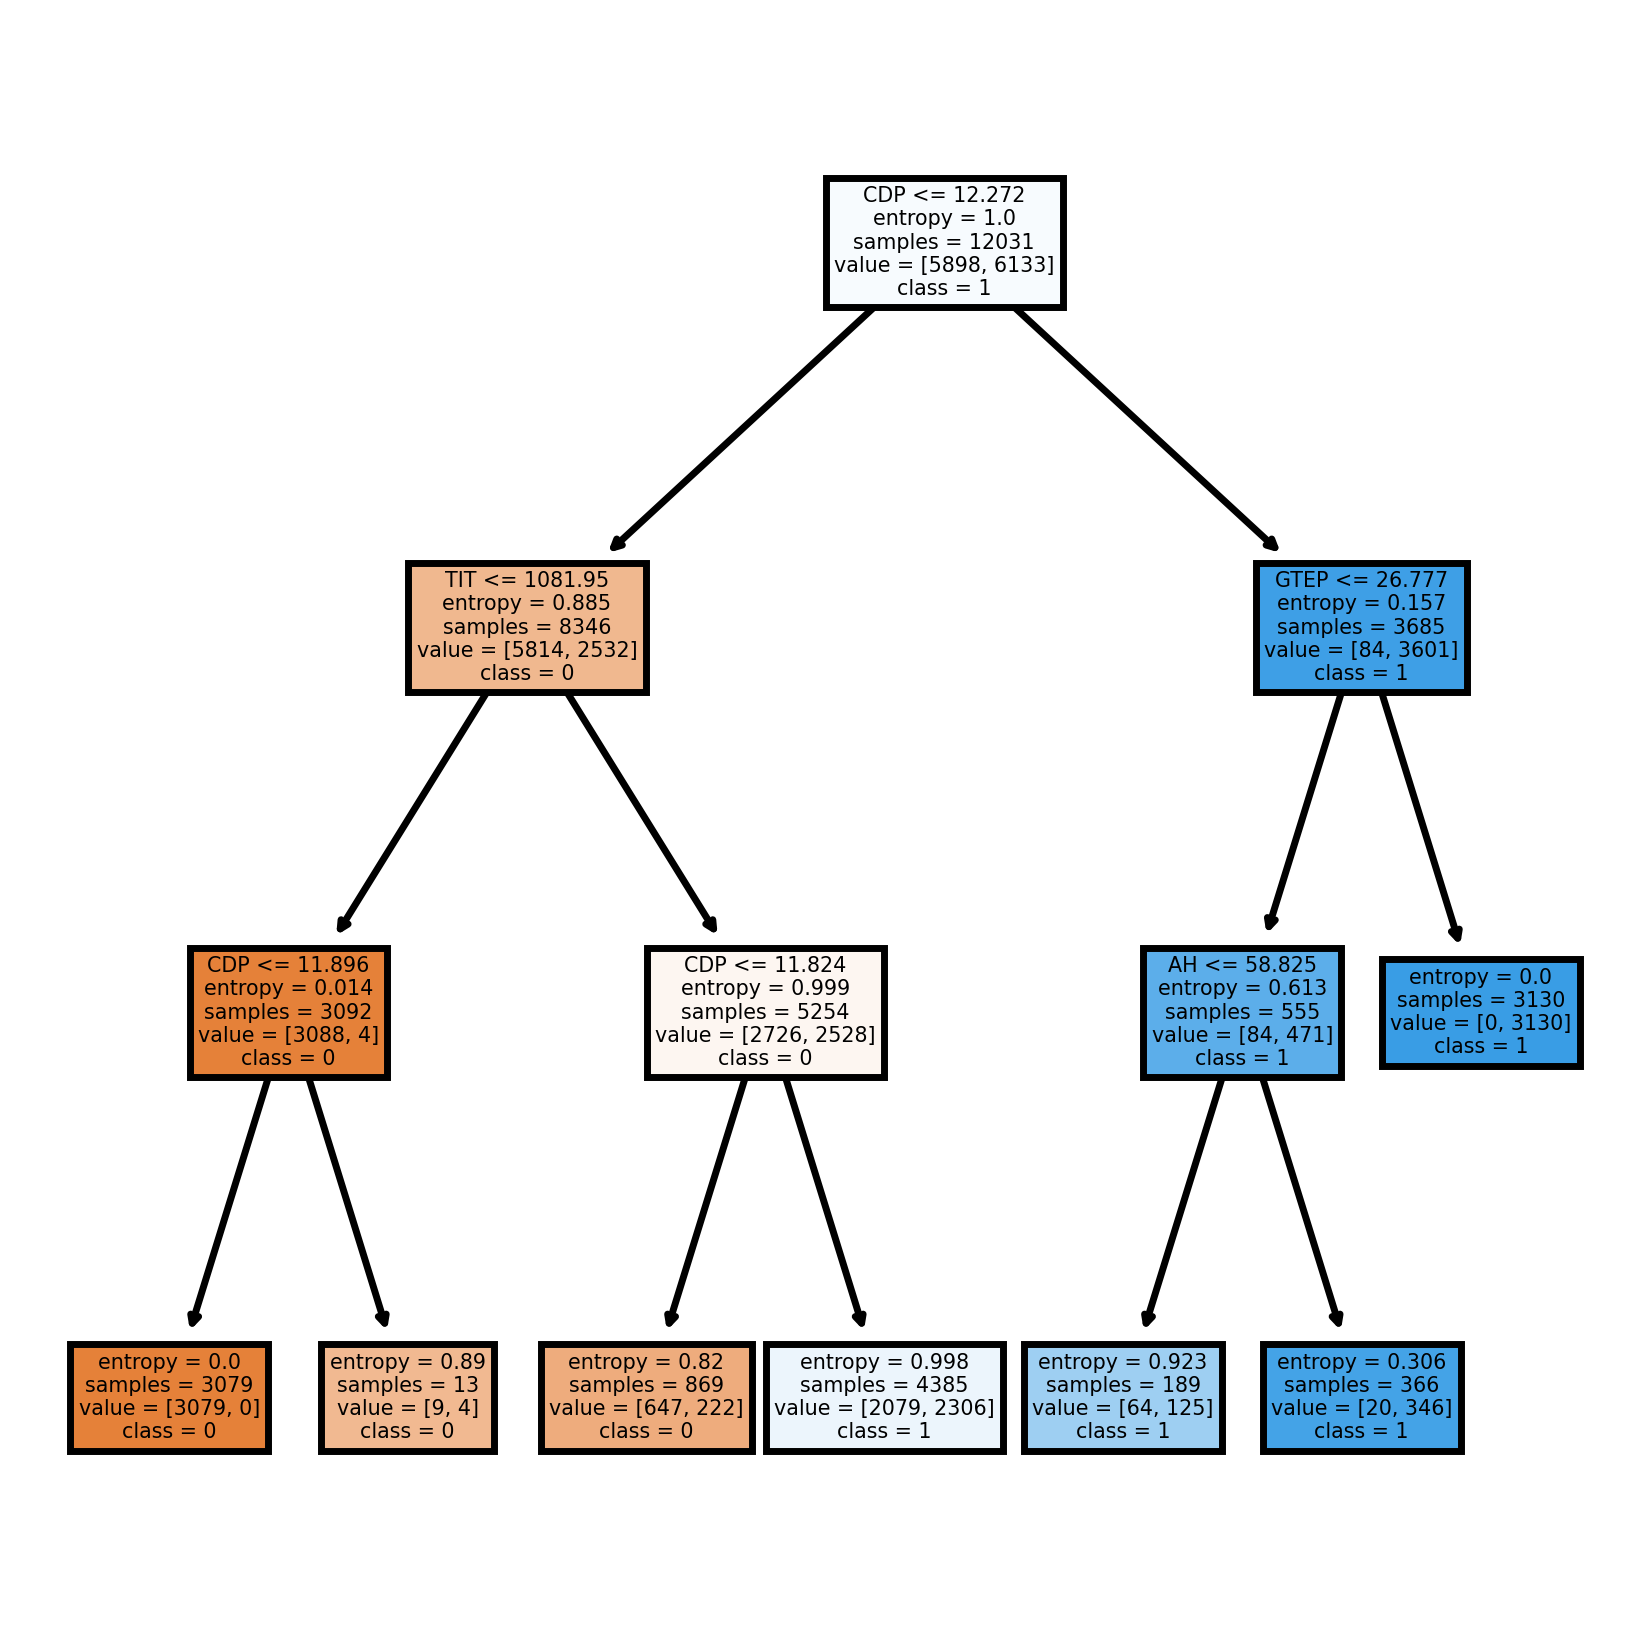

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [ ]:
# Predicting on test data
preds = model.predict(x_test)   # Predicting on test data set
pd.Series(preds).value_counts()   #Getting the count of each category

1    1993
0    1015
dtype: int64

In [ ]:
y_test.value_counts()

1    1525
0    1483
Name: TEY, dtype: int64

In [ ]:
preds

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
pd.crosstab(y_test, preds)  # Getting the 2 way table to understand the correct and wrong predictions.

col_0    0     1
TEY             
0      958   525
1       57  1468

In [ ]:
preds, y_test

(array([1, 1, 1, ..., 0, 0, 1]),
 11682    1
 7392     1
 6700     1
 11742    1
 5012     1
         ..
 11165    0
 768      1
 10533    0
 7017     0
 14176    1
 Name: TEY, Length: 3008, dtype: int64)

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds == y_test), accuracy_score(y_test, preds)

(0.8065159574468085, 0.8065159574468085)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

0.8065159574468085

In [ ]:
# Decision tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = gast.values
X = array[:,:-1]
Y = array[:,-1]
print(X)
print(Y)

[[   6.8594 1007.9      96.799  ...   10.605     3.1547   82.722 ]
 [   6.785  1008.4      97.118  ...   10.598     3.2363   82.776 ]
 [   6.8977 1008.8      95.939  ...   10.601     3.2012   82.468 ]
 ...
 [   7.2647 1006.3      99.496  ...   10.483     7.9632   90.912 ]
 [   7.006  1006.8      99.008  ...   10.533     6.2494   93.227 ]
 [   6.9279 1007.2      97.533  ...   10.583     4.9816   92.498 ]]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
# Find The Accuracy
model.score(X_test, Y_test)

0.5014648199402758

#  Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
# we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [ ]:
y_pred_ffire = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})

In [ ]:
y_pred_ffire

actual  predicted_prob
0         0.0             0.0
1         0.0             0.0
2         0.0             0.0
3         0.0             0.0
4         0.0             0.0
...       ...             ...
15034     0.0             0.0
15035     0.0             0.0
15036     0.0             0.0
15037     0.0             0.0
15038     0.0             0.0

[15039 rows x 2 columns]

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      7381
         1.0       0.89      0.89      0.89      7658

    accuracy                           0.89     15039
   macro avg       0.89      0.89      0.89     15039
weighted avg       0.89      0.89      0.89     15039



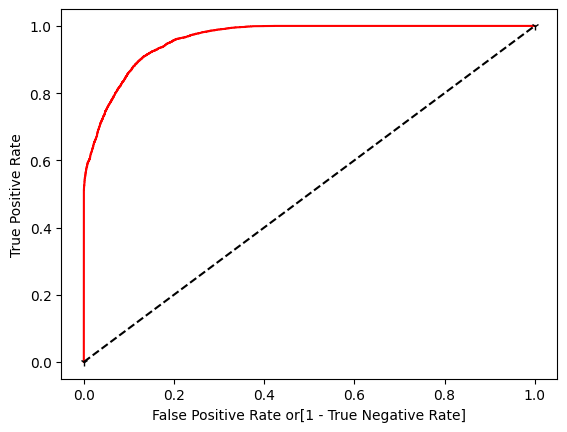

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
auc*100   # Accuracy

88.61500976103865

# KNN Classification

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kfold = KFold(n_splits = 10)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean()*100)

[0.81848404 0.86170213 0.77925532 0.73404255 0.77726064 0.7393617
 0.87234043 0.81117021 0.82845745 0.82102462]
Accuracy is:  80.4309908551691


In [ ]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)

0.7987926221794537


# SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Take a sample of data set for training and testing.
array = gast.values
X = array[:,:-1]
Y = array[:,-1]
print(X)
print(Y)

[[   6.8594 1007.9      96.799  ...   10.605     3.1547   82.722 ]
 [   6.785  1008.4      97.118  ...   10.598     3.2363   82.776 ]
 [   6.8977 1008.8      95.939  ...   10.601     3.2012   82.468 ]
 ...
 [   7.2647 1006.3      99.496  ...   10.483     7.9632   90.912 ]
 [   7.006  1006.8      99.008  ...   10.533     6.2494   93.227 ]
 [   6.9279 1007.2      97.533  ...   10.583     4.9816   92.498 ]]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
gast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Creating training and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Training a SVM classifier using SVC class
svm = SVC(kernel = 'linear', random_state = 1, C = 0.1)
svm.fit(X_train_std, Y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [ ]:
# Mode performance
y_pred = svm.predict(X_test_std)
print("Accuracy: %.3f" % accuracy_score(Y_test, y_pred))

Accuracy: 0.902


# Accuracy is very small so we predict model using SVM.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [ ]:
SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train,Y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


In [ ]:
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma' : [0.5,0.1,0.1], 'C':[10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(X_train, Y_train)

In [ ]:
gsv.best_params_, gsv.best_score_

In [ ]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy is: ", acc)
confusion_matrix(Y_test, y_pred)